# Summary

The long term rainfall data (between 1994 and 2018) at the 4 major reservoirs were plotted and examined for any trends. Plots of the monthly, annual, maximum, and minimum values showed no significant deviations from "normal" rainfall patterns. It is recommended that this study be conducted with a longer dataset if possible.

# Aim
There's been a lot of speculation that rainfall has been decreasing over the years, causing water woes throughout Trinidad and Tobago. Here I will examine the historical monthly rainfall values at the 4 major reservoirs (Caroni-Arena, Hollis, Navet, and Hillsborough in Tobago) to look for any evidence that this is true. I have months from 1994 to 2018. That's not enough but let's go anyway.

In [1]:
import pandas as pd
%matplotlib inline

# Data Prep

In [2]:
df = pd.read_csv("ReservoirRainfall.csv")
df.head()

,Date,Caroni,Navet,Hollis,Hillsborough
0,03/01/2018,123.8,41.8,151.2,32.8
1,02/01/2018,100.6,82.8,128.0,150.0
2,01/01/2018,155.4,168.4,243.2,237.8
3,12/01/2017,401.2,467.4,536.0,316.8
4,11/01/2017,148.0,207.4,233.0,323.8


In [3]:
df.Date = pd.to_datetime(df.Date)          #Changing the date column to date objects and setting as the index
df = df.sort_values('Date')
df.set_index('Date', inplace=True)
df.head()

,Caroni,Navet,Hollis,Hillsborough
Date,,,,
1994-01-01,101.542,123.155,163.765000,105.881
1994-02-01,75.263,76.695,85.701000,61.204
1994-03-01,40.502,62.063,84.786333,56.863
1994-04-01,79.423,85.095,126.181000,73.508
1994-05-01,143.962,165.100,195.160000,153.434


In [4]:
df.describe()        #won't bother checking for nulls because I know there aren't any. Poor practice I know yes

,Caroni,Navet,Hollis,Hillsborough
count,291.000000,291.000000,291.000000,291.000000
mean,181.688186,182.563564,247.968892,187.496416
std,115.155944,120.852946,146.938104,119.619290
min,4.200000,1.110000,1.363333,2.030000
25%,87.500000,78.450000,126.440500,83.365000
50%,171.600000,175.500000,245.850000,184.490000
75%,263.950000,264.324500,347.110000,268.020000
max,573.300000,604.500000,832.100000,557.800000


From the description of the reservoirs, everything looks as expected. Hollis clearly gets more rainfall than everybody else. I'm not sure if its surprising that Hillsborough gets more than Caroni and Navet. That max value at Hollis looks pretty crazy.

# Rolling Averages
Plotting the rolling averages may give a better idea at how the rainfall patterns are changing. After some experimenting, I've found that a rolling window of 24 months gives the best representation.

In [5]:
roll_window = 24
df['Caroni_avg'] = df['Caroni'].rolling(window=roll_window).mean()
df['Navet_avg'] = df['Navet'].rolling(window=roll_window).mean()
df['Hollis_avg'] = df['Hollis'].rolling(window=roll_window).mean()
df['Hillsborough_avg'] = df['Hillsborough'].rolling(window=roll_window).mean()
df.head()

,Caroni,Navet,Hollis,Hillsborough,Caroni_avg,Navet_avg,Hollis_avg,Hillsborough_avg
Date,,,,,,,,
1994-01-01,101.542,123.155,163.765000,105.881,NaN,NaN,NaN,NaN
1994-02-01,75.263,76.695,85.701000,61.204,NaN,NaN,NaN,NaN
1994-03-01,40.502,62.063,84.786333,56.863,NaN,NaN,NaN,NaN
1994-04-01,79.423,85.095,126.181000,73.508,NaN,NaN,NaN,NaN
1994-05-01,143.962,165.100,195.160000,153.434,NaN,NaN,NaN,NaN


#  Data Visualization

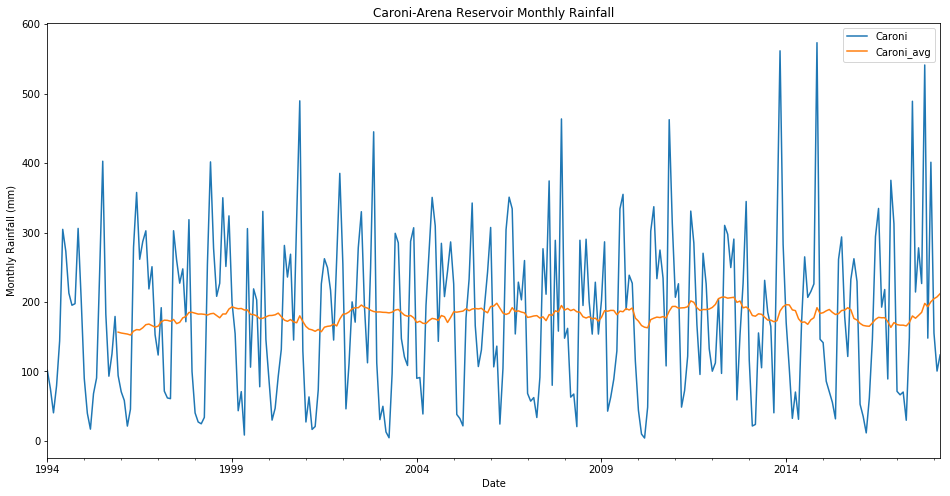

In [6]:
C = df[['Caroni', 'Caroni_avg']].plot(figsize=(16,8), title='Caroni-Arena Reservoir Monthly Rainfall')
C.set_ylabel("Monthly Rainfall (mm)")

At Caroni-Arena Reservoir, rainfall seems to be pretty constant. 2014 and 2015 in particular saw a lot of rainfall.

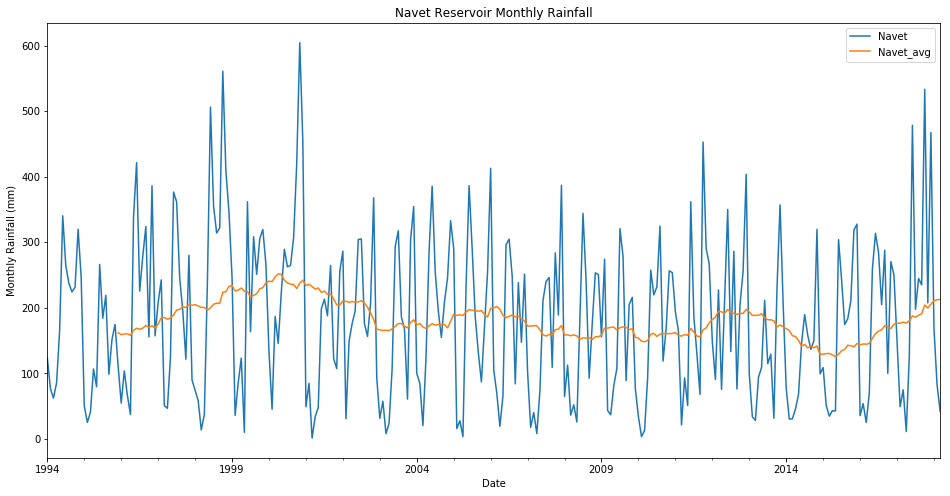

In [7]:
N = df[['Navet', 'Navet_avg']].plot(figsize=(16,8), title='Navet Reservoir Monthly Rainfall')
N.set_ylabel("Monthly Rainfall (mm)")

At Navet Reservoir, no dominant pattern is present on the graph. Heavy rainfall in 1998 and 2001 skews the average upward, while low rainfall between 2014 and 2017 lowered the average.

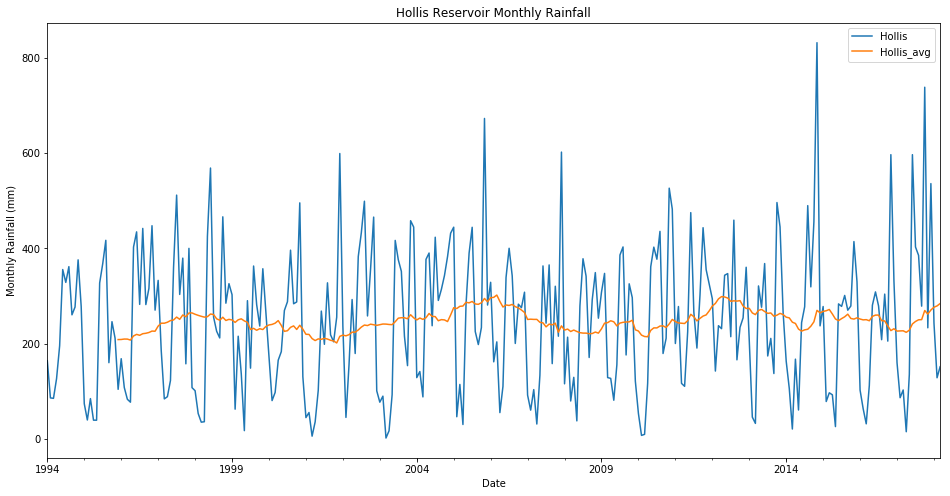

In [8]:
Ho = df[['Hollis', 'Hollis_avg']].plot(figsize=(16,8), title='Hollis Reservoir Monthly Rainfall')
Ho.set_ylabel("Monthly Rainfall (mm)")

At Hollis Reservoir, the appears to be constant. The regular fluctuations in the average line may be caused by the El Nino/ La Nina phenomenon. However after each cycle, the rainfall returns to the same level.

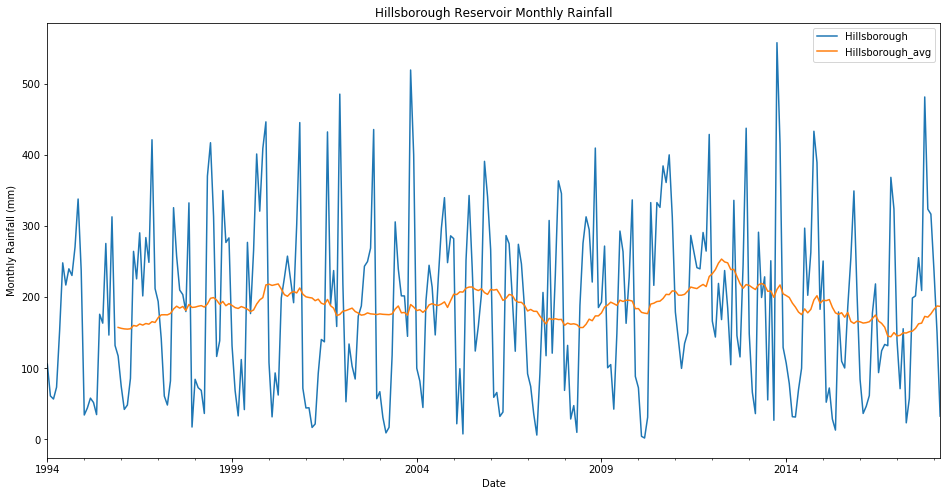

In [9]:
Hi = df[['Hillsborough', 'Hillsborough_avg']].plot(figsize=(16,8), title='Hillsborough Reservoir Monthly Rainfall')
Hi.set_ylabel("Monthly Rainfall (mm)")

At Hillsborough reservoir in Tobago, the rainfall again has a cyclic pattern. From 2013 to 2017 there was a decrease in rainfall but is now looking to head up again, similar to what happend from 2008 to 2013.

# Annual Rainfall Volumes

Based on the monthly rainfall data, there is not enough evidence to suggest that rainfall is decreasing. Now we are going to plot the annual rainfall volumes to back up this claim. I'm going to create a new dataframe to hold these values.

In [10]:
annual_df = df[['Caroni', 'Navet', 'Hollis', 'Hillsborough']].groupby(df.index.year).sum()    #groupby to organise in years
annual_df.head()

,Caroni,Navet,Hollis,Hillsborough
Date,,,,
1994,2133.822,2374.977,2891.354333,2233.217
1995,1625.910,1505.200,2107.100000,1548.010
1996,2306.270,2547.460,3311.580000,2400.170
1997,2137.760,2342.400,3030.070000,2054.950
1998,2419.900,3235.400,2987.310000,2529.480


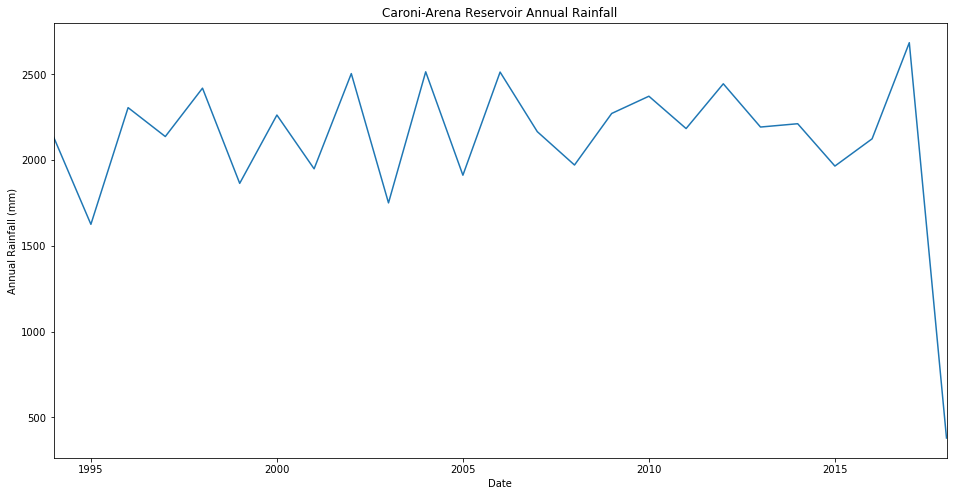

In [11]:
C = annual_df['Caroni'].plot(figsize=(16,8), title='Caroni-Arena Reservoir Annual Rainfall')
C.set_ylabel("Annual Rainfall (mm)")

The dip at the end is because all the values for 2018 are not in as yet. But as shown, there are no large deviations from the norm. I suspect this will be true for all of the reservoirs.

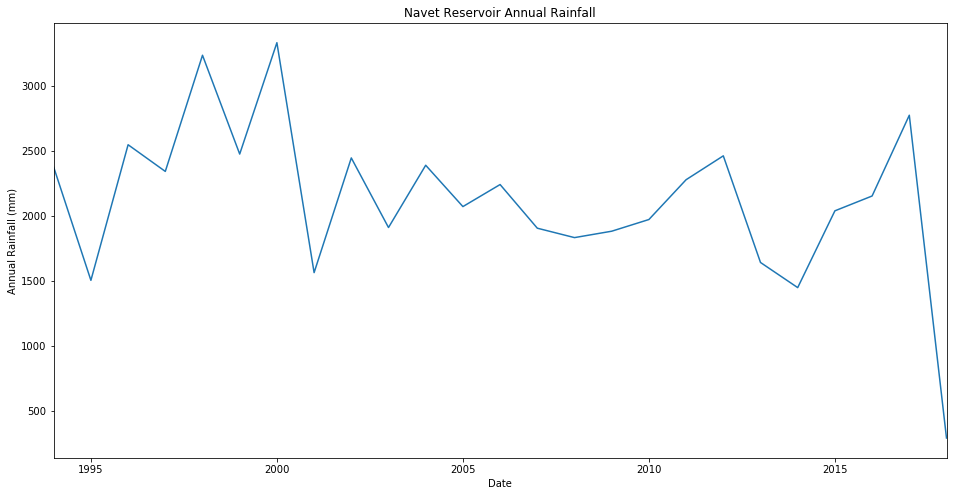

In [12]:
N = annual_df['Navet'].plot(figsize=(16,8), title='Navet Reservoir Annual Rainfall')
N.set_ylabel("Annual Rainfall (mm)")

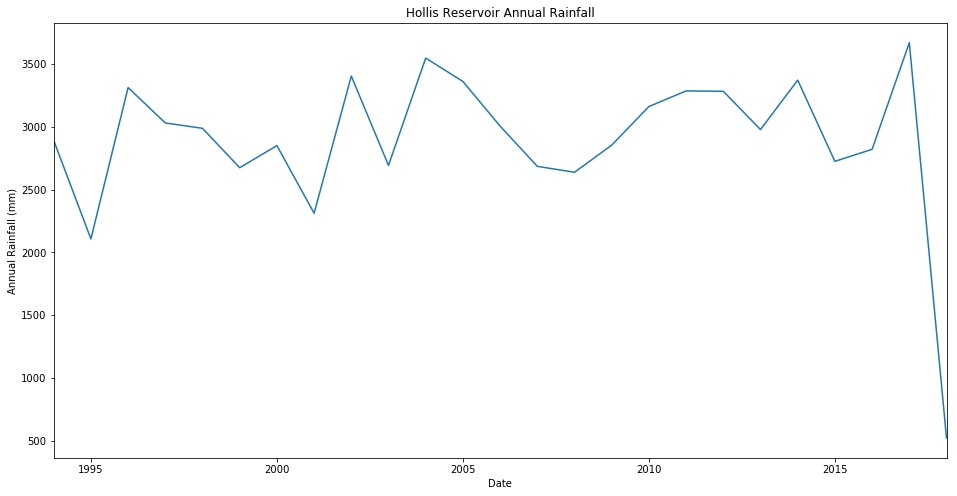

In [13]:
Ho = annual_df['Hollis'].plot(figsize=(16,8), title='Hollis Reservoir Annual Rainfall')
Ho.set_ylabel("Annual Rainfall (mm)")

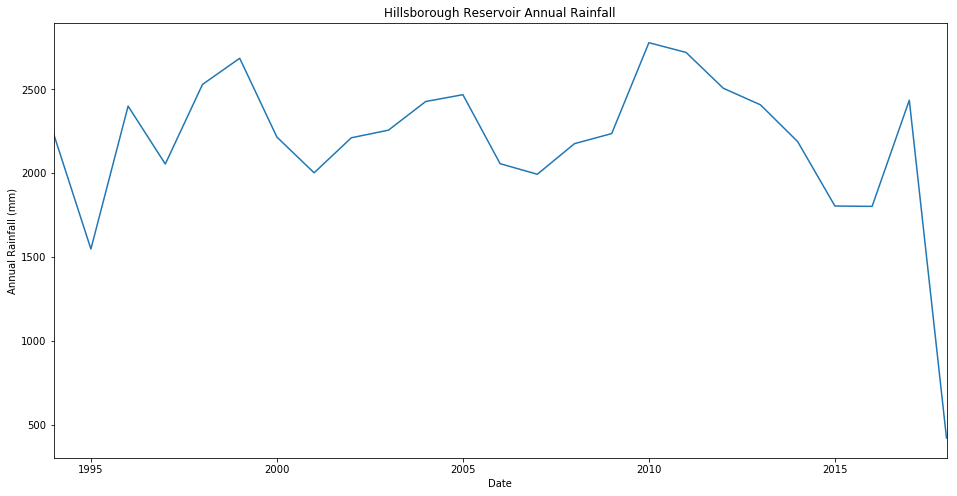

In [14]:
Hi = annual_df['Hillsborough'].plot(figsize=(16,8), title='Hillsborough Reservoir Annual Rainfall')
Hi.set_ylabel("Annual Rainfall (mm)")

Nothing suspicious at Hollis and Hillsborough. This reinforces the idea that there are no significant deviations from the normal rainfall patterns. Everybody is pretty close to that 2000 mm line, except for Hollis who is above.

# What about max and min values?
Are those values deviating from the norm? It is possible that the average is not changing, but the max's are getting higher and the min's are getting lower. It doesn't look like that is the case from the graph, but let's plot some more lines just in case. I'm going to create yet another df. Minimum values are more concerning so those are first.

In [15]:
min_df = df[['Caroni', 'Navet', 'Hollis', 'Hillsborough']].groupby(df.index.year).min()    #groupby to organise in years
min_df.head()

,Caroni,Navet,Hollis,Hillsborough
Date,,,,
1994,40.502,62.063,84.786333,56.863
1995,17.020,25.000,38.800000,34.420
1996,21.400,37.000,76.700000,42.280
1997,60.900,46.500,83.600000,17.500
1998,24.700,13.500,34.700000,36.590


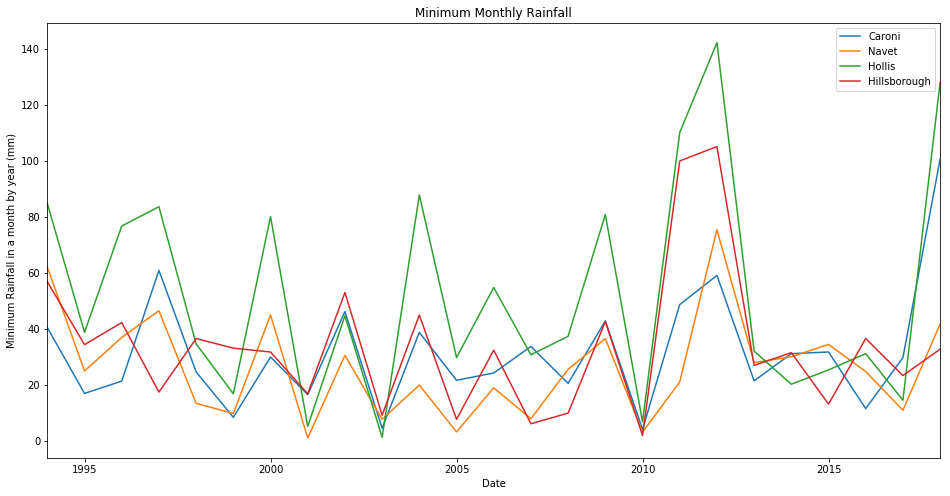

In [16]:
A = min_df.plot(figsize=(16,8), title='Minimum Monthly Rainfall')
A.set_ylabel('Minimum Rainfall in a month by year (mm)')

I've plotted all on the same graph because its all over the place and shows no patterns. Same for the maximum values below.

In [17]:
max_df = df[['Caroni', 'Navet', 'Hollis', 'Hillsborough']].groupby(df.index.year).max()    #groupby to organise in years
max_df.head()

,Caroni,Navet,Hollis,Hillsborough
Date,,,,
1994,305.946,340.233,375.762,338.021
1995,402.700,266.100,416.800,313.000
1996,357.700,421.460,447.500,421.360
1997,318.540,376.500,511.800,332.600
1998,401.700,560.900,568.700,417.180


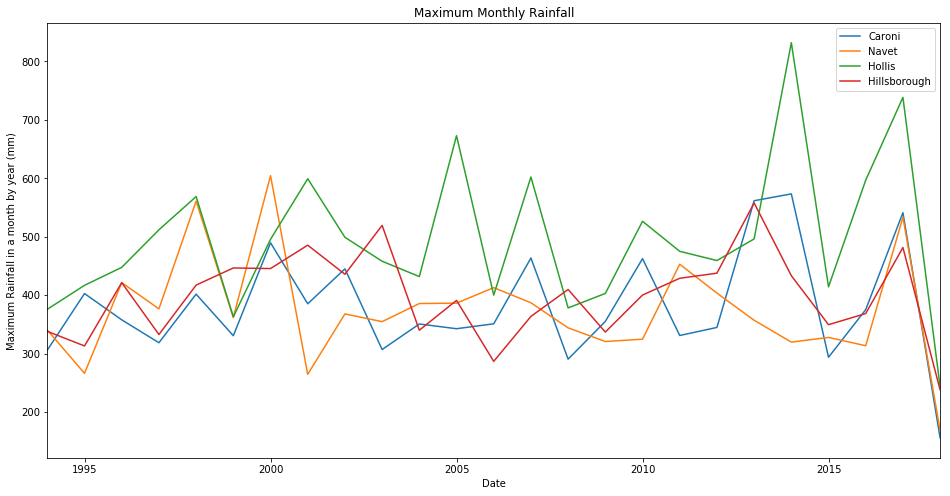

In [18]:
A = max_df.plot(figsize=(16,8), title='Maximum Monthly Rainfall')
A.set_ylabel('Maximum Rainfall in a month by year (mm)')

# Conclusions

Based on this simple study, there is not enough evidence to suggest that rainfall at the major reservoirs across Trinidad and Tobago is decreasing. Then what is the reason for the increasing water woes? Two major reasons are:

1. Increased Demand/ consumption
2. Increased Unaccounted-For-Water
3. Stronger Evaporation
4. Less runoff in reservoir


There are probably many other factors that affect water resources throughout the country. That is why an Integrated Water Resources Management approach is recommended. It is also recommended that this study be repeated with a larger dataset. Maybe it is possible that rainfall 50 years was more than what we receive today. Without data I can't backup that claim.